In [1]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('abalone.csv')
#data.Sex = pd.factorize(data.Sex)[0] #можно так, тогда ответ на задачу: 24
#так рекомендуется в задании
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))
#data['Sex'] = data['Sex'].apply({'F':-1, 'I':0, 'M':1}.get) #а можно так
X = data.loc[:, 'Sex':'ShellWeight']
Y = data.loc[:,'Rings']

In [3]:
#оценивание качества на кросс-валидации с заданным числом деревьем от и до, используя метрику R2
kf = KFold(n_splits=5, shuffle=True,random_state=1)
quality = {}
for i in range(1, 51):
    reg = RandomForestRegressor(n_estimators=i, random_state=1, n_jobs=-1)
    quality[i] = (cross_val_score(estimator=reg, X = X, y = Y, cv=kf, scoring='r2')).mean()

In [4]:
#нахождение минимиального числа деревьев такого, что качество больше 52%
min([(k, v) for k, v in quality.items() if v > 0.52], key=lambda x: x[1])

(21, 0.520529096463528)

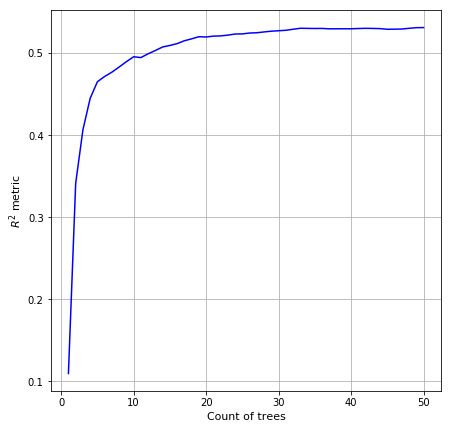

In R^2 bigger is better!!


In [5]:
plt.figure(figsize=(7,7))
plt.plot(quality.keys(), quality.values(), c='b')
plt.xlabel('Count of trees', fontsize=11)
plt.ylabel('$R^2$ metric', fontsize=11)
plt.grid()
plt.show()
print('In R^2 bigger is better!!')

In [104]:
'''
from sklearn.model_selection import KFold, GridSearchCV
param_grid = {
    'random_state': [1],
    'n_estimators': np.arange(1,51)
}
rf = RandomForestRegressor()
kf = KFold(n_splits=5, random_state=1, shuffle=True)
gs = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='r2', cv=kf)
gs.fit(X,y)
cv_results = pd.DataFrame(gs.cv_results_)
print(np.min(np.where(cv_results.mean_test_score > 0.52))+1)
#22
'''

"\nfrom sklearn.model_selection import KFold, GridSearchCV\nparam_grid = {\n    'random_state': [1],\n    'n_estimators': np.arange(1,51)\n}\nrf = RandomForestRegressor()\nkf = KFold(n_splits=5, random_state=1, shuffle=True)\ngs = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='r2', cv=kf)\ngs.fit(X,y)\ncv_results = pd.DataFrame(gs.cv_results_)\nprint(np.min(np.where(cv_results.mean_test_score > 0.52))+1)\n#22\n"